In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
from os.path import isfile,join

def convert_frames_to_video(pathIn,pathout,fps):
    frame_array = []
    files = [f for f in os.listdir()]

In [4]:
os.listdir("./test_images")

['image4.jpg', 'image1.jpg', 'image2.jpg', 'Image3.jpg']

In [5]:
image = cv2.imread("./test_images/image3.jpg")

In [6]:
type(image)

numpy.ndarray

In [7]:
image.shape

(360, 600, 3)

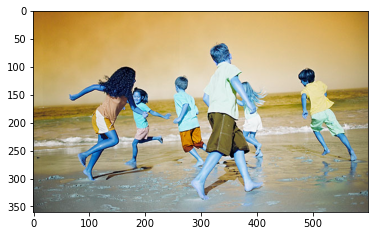

In [8]:
plt.imshow(image)

In [9]:
image1 = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

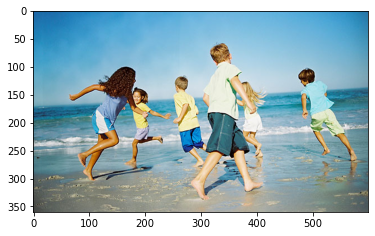

In [10]:
plt.imshow(image1)

In [13]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [14]:
classes =[]
with open("./coco.names",'r') as f:
    classes = f.read().splitlines()
    

In [15]:
len(classes)

80

In [16]:
img = cv2.imread("./test_images/image3.jpg")

In [17]:
# Resizing the image to avoid large computation
blob = cv2.dnn.blobFromImage(img,1/255 , (320,320),(0,0,0), swapRB = True, crop = False)

In [18]:
blob.shape

(1, 3, 320, 320)

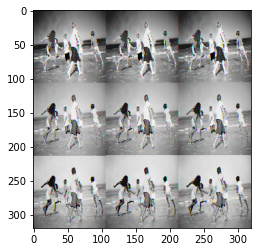

In [19]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [20]:
yolo.setInput(blob)

In [24]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)


In [26]:
#width = 160
#height = 160
boxes =[]
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.4:
            center_x = int(detection[0]*width)
            center_x = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
        
            x = int(center_x- w/2)
            y = int(center_x- h/2)
        
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
        

In [27]:
# it is able to detect six objects in the image
len(boxes)

6

In [28]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [29]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size =(len(boxes),4))


In [31]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    
    label  =  str(classes[class_ids[i]])
    confi = str(round(confidences[i],2))
    color = colors[i]
    
    cv2.rectangle(img, (x,y),(x+w,y+h),color,2)
    cv2.putText(img,label +" "+confi,(x,y+20),font,2,(255,255,255),2)

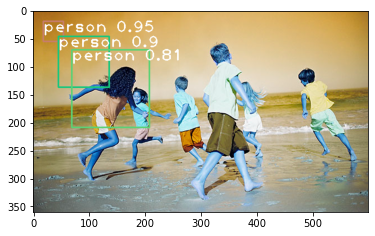

In [32]:
plt.imshow(img)

In [33]:
cv2.imwrite("./img.jpg",img)

True